In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

In [2]:
car=pd.read_csv("/Users/xinjianlu/Downloads/Automobile_data.csv")

In [3]:
car.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9,154.0,5000.0,19,26,16500.0


In [4]:
car.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          0
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Data Exploration

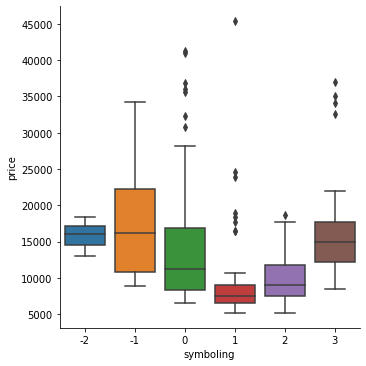

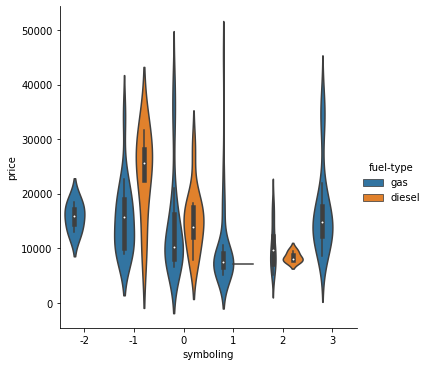

In [6]:
sns.catplot(x="symboling", y="price", data=car,kind="box")
sns.catplot(x="symboling", y="price", data=car,kind="violin",hue="fuel-type")

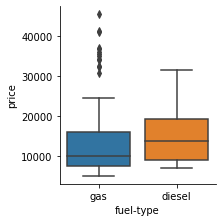

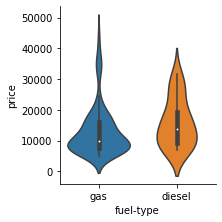

In [7]:
sns.catplot(x="fuel-type", y="price", data=car,kind="box",height=3)
sns.catplot(x="fuel-type", y="price", data=car,kind="violin",height=3)

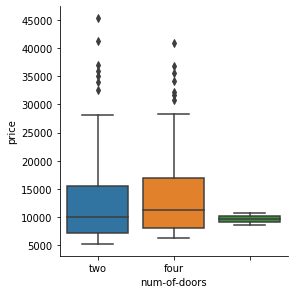

In [8]:
sns.catplot(x="num-of-doors", y="price", data=car,kind="box",height=4)

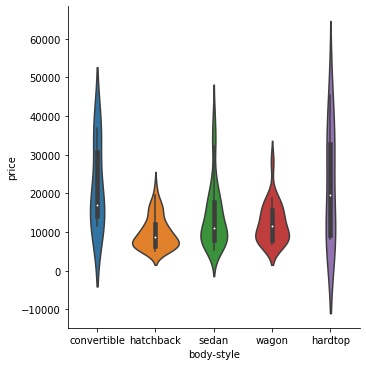

In [9]:
sns.catplot(x="body-style", y="price", data=car,kind="violin",height=5)

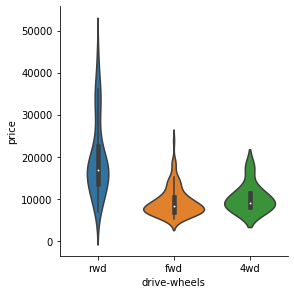

In [10]:
sns.catplot(x="drive-wheels", y="price", data=car,kind="violin",height=4)

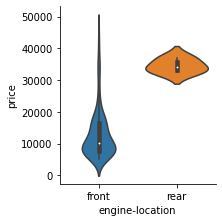

In [11]:
sns.catplot(x="engine-location", y="price", data=car,kind="violin",height=3)

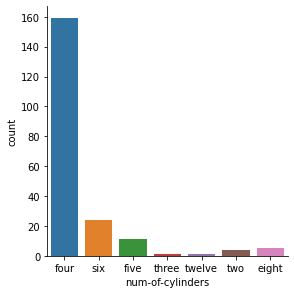

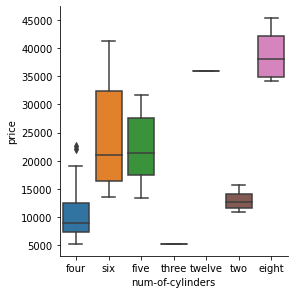

In [12]:
sns.catplot(x="num-of-cylinders", data=car,kind="count",height=4)
sns.catplot(x="num-of-cylinders", y="price", data=car,kind="box",height=4)

In [13]:
car["volume"]=car["length"]*car["width"]*car["height"]

In [14]:
car.drop(["length","width","height"],axis=1,inplace=True)

<AxesSubplot:>

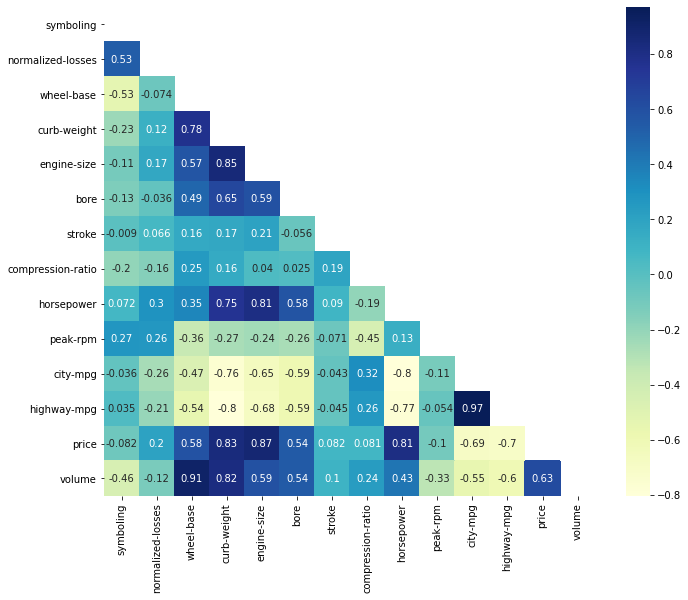

In [15]:
mask=np.zeros_like(car.corr())
mask[np.triu_indices_from(mask)]=True
f,ax=plt.subplots(figsize=(11,9))
sns.heatmap(car.corr(),mask=mask,cmap="YlGnBu",ax=ax,annot=True)

# Feature Engineering

In [16]:
#car["num-of-cylinders"].value_counts()
from sklearn.preprocessing import LabelEncoder
gle=LabelEncoder()
cylinder_labels=gle.fit_transform(car["num-of-cylinders"])
cylinder_mappings={index: label for index, label in enumerate(gle.classes_)}
print(cylinder_mappings)
car["num-of-cylinders"]=cylinder_labels

{0: 'eight', 1: 'five', 2: 'four', 3: 'six', 4: 'three', 5: 'twelve', 6: 'two'}


In [17]:
symboling_labels=gle.fit_transform(car["symboling"])
symbiling_mappings={index: label for index, label in enumerate(gle.classes_)}
print(symbiling_mappings)
car["symboling"]=symboling_labels

{0: -2, 1: -1, 2: 0, 3: 1, 4: 2, 5: 3}


In [18]:
car.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,volume
0,5,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,2548,dohc,2,130,mpfi,3.47,2.68,9,111.0,5000.0,21,27,13495.0,528019.904
1,5,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,2548,dohc,2,130,mpfi,3.47,2.68,9,111.0,5000.0,21,27,16500.0,528019.904
2,3,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,2823,ohcv,3,152,mpfi,2.68,3.47,9,154.0,5000.0,19,26,16500.0,587592.640


In [19]:
car["normalized-losses"]=car.groupby(by="symboling")["normalized-losses"].transform(lambda x:x.fillna(x.mean()))

In [20]:
car.dropna(how="any",inplace=True)

In [21]:
num=["normalized-losses","wheel-base","curb-weight","engine-size","bore","stroke","compression-ratio","horsepower"
     ,"peak-rpm","city-mpg","highway-mpg","volume","price"]

<AxesSubplot:>

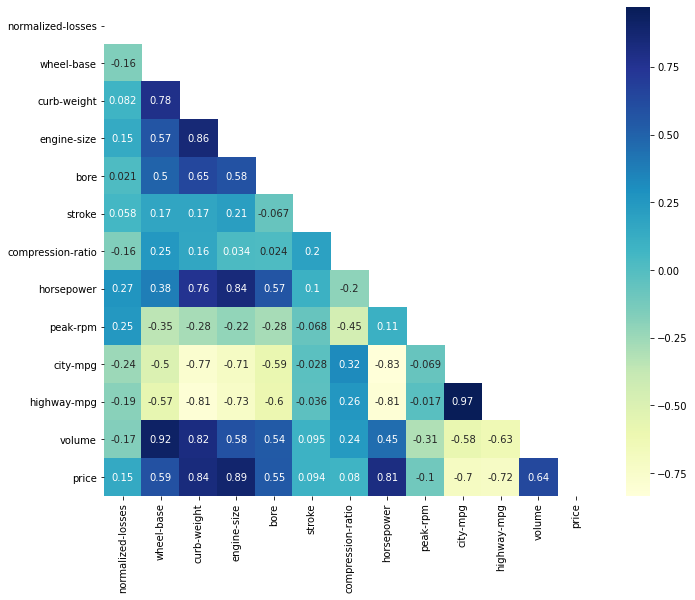

In [22]:
mask=np.zeros_like(car[num].corr())
mask[np.triu_indices_from(mask)]=True
f,ax=plt.subplots(figsize=(11,9))
sns.heatmap(car[num].corr(),mask=mask,cmap="YlGnBu",ax=ax,annot=True)

**wheel-base** has strong correlationship with **volume**, so we are going to remove it;
**city-mpg** has strong correlationship with **highway-mpg**, we remove it as well;
**curb-weight** is strong correlated with **horse-power**,**engine-size** and **volume**, but it also highly correlated with **price**, so I will not remove it this time
**stroke** and **compression-ratio** has significant small relationship with **price** , they should be removed

In [23]:
numerical=["normalized-losses","volume","engine-size","horsepower","curb-weight","bore","highway-mpg","peak-rpm"]

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
car[numerical]=scaler.fit_transform(car[numerical])

In [25]:
car.drop(["num-of-doors"],axis=1,inplace=True)

In [26]:
categorical=["make","fuel-type","aspiration","body-style","drive-wheels","engine-location","engine-type","fuel-system"]

In [27]:
dummies=pd.get_dummies(car[categorical])
car=car.join(dummies).drop(categorical,axis=1)

In [28]:
car.drop(["stroke","compression-ratio","city-mpg"],axis=1,inplace=True)
car.drop(["wheel-base"],axis=1,inplace=True)

#### 似乎cross_val_score不会对数据进行随机化，这在相似数据分组在一起时可能导致更糟的预测。我找到的最简单的解决方案（通过此答案）是在运行模型之前简单地对数据帧进行洗牌

In [37]:
shuffled_car = car.reindex(np.random.permutation(car.index))

In [38]:
shuffled_car.head()

,symboling,normalized-losses,curb-weight,num-of-cylinders,engine-size,bore,horsepower,peak-rpm,highway-mpg,price,volume,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,fuel-type_diesel,fuel-type_gas,aspiration_std,aspiration_turbo,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-location_front,engine-location_rear,engine-type_dohc,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,fuel-system_1bbl,fuel-system_2bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
35,2,0.235602,0.202483,2,0.116981,0.264286,0.130841,0.755102,0.473684,7295.0,0.298187,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0
102,2,0.225131,0.701319,3,0.452830,0.635714,0.485981,0.428571,0.157895,14399.0,0.600041,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
167,4,0.361257,0.408068,2,0.320755,0.771429,0.317757,0.265306,0.368421,8449.0,0.377284,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0
32,3,0.188482,0.135376,2,0.067925,0.264286,0.056075,0.551020,0.684211,5399.0,0.132998,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0
178,5,0.691099,0.577192,3,0.415094,0.521429,0.528037,0.428571,0.210526,16558.0,0.491529,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0


In [39]:
X=shuffled_car.drop(["price"],axis=1)
y=shuffled_car["price"]

# Modeling

### Linear Regression

In [40]:
X.head()

,symboling,normalized-losses,curb-weight,num-of-cylinders,engine-size,bore,horsepower,peak-rpm,highway-mpg,volume,make_alfa-romero,make_audi,make_bmw,make_chevrolet,make_dodge,make_honda,make_isuzu,make_jaguar,make_mazda,make_mercedes-benz,make_mercury,make_mitsubishi,make_nissan,make_peugot,make_plymouth,make_porsche,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,fuel-type_diesel,fuel-type_gas,aspiration_std,aspiration_turbo,body-style_convertible,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_4wd,drive-wheels_fwd,drive-wheels_rwd,engine-location_front,engine-location_rear,engine-type_dohc,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,fuel-system_1bbl,fuel-system_2bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
35,2,0.235602,0.202483,2,0.116981,0.264286,0.130841,0.755102,0.473684,0.298187,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0
102,2,0.225131,0.701319,3,0.452830,0.635714,0.485981,0.428571,0.157895,0.600041,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
167,4,0.361257,0.408068,2,0.320755,0.771429,0.317757,0.265306,0.368421,0.377284,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0
32,3,0.188482,0.135376,2,0.067925,0.264286,0.056075,0.551020,0.684211,0.132998,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0
178,5,0.691099,0.577192,3,0.415094,0.521429,0.528037,0.428571,0.210526,0.491529,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0


In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [42]:
lr=LinearRegression()
print("the R^2 score for linear regression is {:.3}".format(cross_val_score(lr, X, y, cv=5,scoring="r2").mean()))

the R^2 score for linear regression is 0.902


In [43]:
cross_val_score(lr, X, y, cv=5)

array([0.86800819, 0.95278858, 0.85226614, 0.90689299, 0.92955177])

### Lasso Regression (L1 Regularization)

In [44]:
from sklearn import linear_model
lasso=linear_model.Lasso(random_state=0)

In [45]:
cross_val_score(lasso, X, y, cv=5)

array([0.87776112, 0.95351592, 0.85817352, 0.90915472, 0.92930713])

In [46]:
from sklearn.model_selection import GridSearchCV
params={"alpha":[10,50,100,200,300]}
g=GridSearchCV(lasso, param_grid=params).fit(X,y)

In [47]:
print(g.best_score_)
print(g.best_params_)

0.9114185334657288
{'alpha': 10}


In [48]:
#g.cv_results_

In [49]:
params1={"alpha":range(10,50)}
g1=GridSearchCV(lasso, param_grid=params1,scoring="r2").fit(X,y)
print(g1.best_score_)
print(g1.best_params_)

0.9114185334657288
{'alpha': 10}


In [50]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5).fit(X,y)
print(lassocv.score(X,y))
print(lassocv.alpha_)

0.9553157379005073
5.79465716522223


In [51]:
cross_val_score(linear_model.Lasso(alpha=lassocv.alpha_,random_state=123), X, y, cv=5).mean()

0.9116958172417601

In [52]:
best_lasso=linear_model.Lasso(alpha=10,random_state=123).fit(X,y)

lasso_coefs=pd.Series(best_lasso.coef_ ,index=X.columns)
significant_lasso_coefs=pd.concat([lasso_coefs.sort_values().head(10),lasso_coefs.sort_values().tail(10)])

<AxesSubplot:>

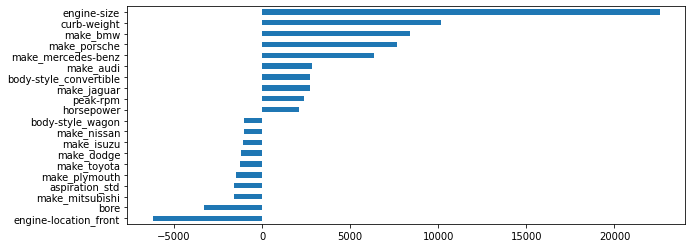

In [53]:
plt.figure(figsize=(10,4))
significant_lasso_coefs.plot(kind="barh")

In [54]:
print("lasso picked {0} variables and eliminated {1} variables.".format(
                len([i for i in best_lasso.coef_ if i != 0]),len([i for i in best_lasso.coef_ if i == 0])))

lasso picked 39 variables and eliminated 18 variables.


### Ridge Regression (L2 Regulariztion)

In [55]:
from sklearn.linear_model import Ridge
ridge=Ridge(random_state=123)

In [56]:
cross_val_score(ridge, X, y, cv=5).mean()

0.9072908630583487

In [57]:
from sklearn.model_selection import GridSearchCV
params3={"alpha":[0.1,0.3,0.7,0.9,1]}
g3=GridSearchCV(ridge, param_grid=params3).fit(X,y)

In [58]:
print(g3.best_score_)
print(g3.best_params_)

0.9128692311339007
{'alpha': 0.3}


In [59]:
#g3.cv_results

In [60]:
best_ridge=g3.best_estimator_.fit(X,y)

ridge_coefs=pd.Series(best_ridge.coef_ ,index=X.columns)
significant_ridge_coefs=pd.concat([ridge_coefs.sort_values().head(10),ridge_coefs.sort_values().tail(10)])

<AxesSubplot:>

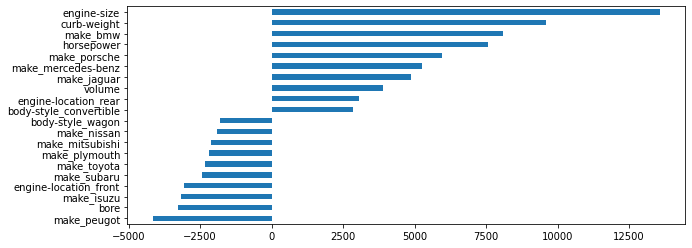

In [61]:
plt.figure(figsize=(10,4))
significant_ridge_coefs.plot(kind="barh")

### Random Forest Regressor

In [62]:
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor(n_estimators=100,random_state=0)

In [63]:
cross_val_score(forest,X,y,cv=5,scoring="r2")

array([0.89598058, 0.94693459, 0.87287262, 0.890229  , 0.93453226])

In [64]:
params2={"max_depth":range(3,11),"min_samples_split":range(2,20,1)}
g2=GridSearchCV(forest, param_grid=params2,n_jobs=-1).fit(X,y)

In [65]:
print(g2.best_score_)
print(g2.best_params_)

0.911015256715136
{'max_depth': 10, 'min_samples_split': 3}


In [66]:
g2.best_estimator_

RandomForestRegressor(max_depth=10, min_samples_split=3, random_state=0)

In [67]:
best_tree=g2.best_estimator_

In [68]:
tree_coefs=pd.Series(best_tree.feature_importances_,index=X.columns).sort_values()

<AxesSubplot:>

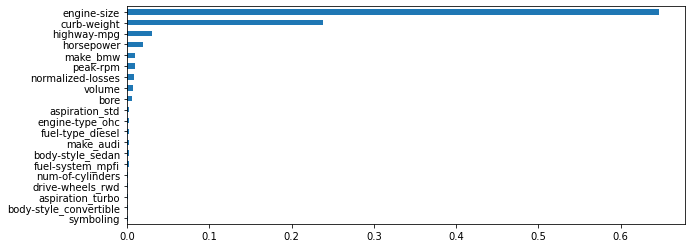

In [69]:
significant_tree_coefs=tree_coefs.tail(20)
plt.figure(figsize=(10,4))
significant_tree_coefs.plot(kind="barh")

# Take a glance how well the three regressor works

In [81]:
pd.Series({"lr_score":cross_val_score(lr, X, y, cv=5,scoring="r2").mean(),
              "lasso_score":cross_val_score(linear_model.Lasso(alpha=10,random_state=123), X, y, cv=5).mean(),
              "ridge_score":g3.best_score_,
              "random_forest_score":g2.best_score_})

lr_score               0.901902
lasso_score            0.911419
ridge_score            0.912869
random_forest_score    0.911015
dtype: float64

In [74]:
lr_result=lr.fit(X,y).predict(X)
lasso_result=best_lasso.predict(X)
ridge_result=best_ridge.predict(X)
forest_result=best_tree.fit(X,y).predict(X)

In [78]:
pd.DataFrame({"y":y,"lr_result":lr_result,"lasso_result":lasso_result,"ridge_result":ridge_result,"forest_result":forest_result}).head(10)

,y,lr_result,lasso_result,ridge_result,forest_result
35,7295.0,7464.665553,7812.119131,7742.609250,7304.314040
102,14399.0,16373.550216,17231.287129,16694.827629,15233.026563
167,8449.0,11748.237865,12080.565872,12225.334601,9021.265966
32,5399.0,4896.667138,5128.919447,5261.574744,5653.603560
178,16558.0,15942.806724,16834.690161,16389.492458,16703.863795
18,5151.0,5151.000000,1672.249919,3456.738812,5461.711000
161,8358.0,6577.028966,6674.556726,6608.376746,8211.820422
176,10898.0,8874.091705,9629.006254,9553.737520,10519.846933
81,8499.0,7556.899176,8387.460869,8352.688477,8385.992936
199,18950.0,17978.659854,17823.241446,18895.767545,18829.741583
